In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("D:\CAA_Agents\Improved-Credit-Scoring-System-CAA_Agents\dataset\Loan_approval.csv")

In [3]:
df

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,4266,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,4267,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,4268,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved


In [4]:
df.isnull().sum()

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

In [5]:
df.columns = df.columns.str.strip()

In [6]:
columns_to_drop = ['loan_id','residential_assets_value', 'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value']

df.drop(columns_to_drop, axis=1, inplace=True)


In [7]:
df

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,loan_status
0,2,Graduate,No,9600000,29900000,12,778,Approved
1,0,Not Graduate,Yes,4100000,12200000,8,417,Rejected
2,3,Graduate,No,9100000,29700000,20,506,Rejected
3,3,Graduate,No,8200000,30700000,8,467,Rejected
4,5,Not Graduate,Yes,9800000,24200000,20,382,Rejected
...,...,...,...,...,...,...,...,...
4264,5,Graduate,Yes,1000000,2300000,12,317,Rejected
4265,0,Not Graduate,Yes,3300000,11300000,20,559,Approved
4266,2,Not Graduate,No,6500000,23900000,18,457,Rejected
4267,1,Not Graduate,No,4100000,12800000,8,780,Approved


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   no_of_dependents  4269 non-null   int64 
 1   education         4269 non-null   object
 2   self_employed     4269 non-null   object
 3   income_annum      4269 non-null   int64 
 4   loan_amount       4269 non-null   int64 
 5   loan_term         4269 non-null   int64 
 6   cibil_score       4269 non-null   int64 
 7   loan_status       4269 non-null   object
dtypes: int64(5), object(3)
memory usage: 266.9+ KB


In [9]:
df_encode = pd.get_dummies(df, dtype = int)

In [10]:
df_encode

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,education_ Graduate,education_ Not Graduate,self_employed_ No,self_employed_ Yes,loan_status_ Approved,loan_status_ Rejected
0,2,9600000,29900000,12,778,1,0,1,0,1,0
1,0,4100000,12200000,8,417,0,1,0,1,0,1
2,3,9100000,29700000,20,506,1,0,1,0,0,1
3,3,8200000,30700000,8,467,1,0,1,0,0,1
4,5,9800000,24200000,20,382,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
4264,5,1000000,2300000,12,317,1,0,0,1,0,1
4265,0,3300000,11300000,20,559,0,1,0,1,1,0
4266,2,6500000,23900000,18,457,0,1,1,0,0,1
4267,1,4100000,12800000,8,780,0,1,1,0,1,0


In [11]:
df_final = df_encode.drop(['loan_status_ Rejected', 'self_employed_ No', 'education_ Not Graduate'], axis = 1)

In [12]:
df_final

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,education_ Graduate,self_employed_ Yes,loan_status_ Approved
0,2,9600000,29900000,12,778,1,0,1
1,0,4100000,12200000,8,417,0,1,0
2,3,9100000,29700000,20,506,1,0,0
3,3,8200000,30700000,8,467,1,0,0
4,5,9800000,24200000,20,382,0,1,0
...,...,...,...,...,...,...,...,...
4264,5,1000000,2300000,12,317,1,1,0
4265,0,3300000,11300000,20,559,0,1,1
4266,2,6500000,23900000,18,457,0,0,0
4267,1,4100000,12800000,8,780,0,0,1


In [13]:
df_final.corr()

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,education_ Graduate,self_employed_ Yes,loan_status_ Approved
no_of_dependents,1.000000,0.007266,-0.003366,-0.020111,-0.009998,0.002697,0.000765,-0.018114
income_annum,0.007266,1.000000,0.927470,0.011488,-0.023034,0.011625,0.002368,-0.015189
loan_amount,-0.003366,0.927470,1.000000,0.008437,-0.017035,0.010631,0.001450,0.016150
loan_term,-0.020111,0.011488,0.008437,1.000000,0.007810,-0.008417,0.004107,-0.113036
cibil_score,-0.009998,-0.023034,-0.017035,0.007810,1.000000,-0.004649,-0.004866,0.770518
education_ Graduate,0.002697,0.011625,0.010631,-0.008417,-0.004649,1.000000,-0.023224,0.004918
self_employed_ Yes,0.000765,0.002368,0.001450,0.004107,-0.004866,-0.023224,1.000000,0.000345
loan_status_ Approved,-0.018114,-0.015189,0.016150,-0.113036,0.770518,0.004918,0.000345,1.000000


In [14]:
X = df_final.iloc[:, :-1]
y = df_final.iloc[:,-1]

In [15]:
X

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,education_ Graduate,self_employed_ Yes
0,2,9600000,29900000,12,778,1,0
1,0,4100000,12200000,8,417,0,1
2,3,9100000,29700000,20,506,1,0
3,3,8200000,30700000,8,467,1,0
4,5,9800000,24200000,20,382,0,1
...,...,...,...,...,...,...,...
4264,5,1000000,2300000,12,317,1,1
4265,0,3300000,11300000,20,559,0,1
4266,2,6500000,23900000,18,457,0,0
4267,1,4100000,12800000,8,780,0,0


In [16]:
y

0       1
1       0
2       0
3       0
4       0
       ..
4264    0
4265    1
4266    0
4267    1
4268    1
Name: loan_status_ Approved, Length: 4269, dtype: int32

In [17]:
from sklearn.preprocessing import MinMaxScaler
scale  = MinMaxScaler()

In [18]:
X_not_scale = X[['no_of_dependents','cibil_score','loan_term','education_ Graduate','self_employed_ Yes']]

In [19]:
X_scaled = scale.fit_transform(X[['income_annum'	,'loan_amount']])

In [20]:
X_scaled = pd.DataFrame(X_scaled, columns = [['income_annum'	,'loan_amount']])

In [21]:
X_scaled

,income_annum,loan_amount
0,0.969072,0.755102
1,0.402062,0.303571
2,0.917526,0.750000
3,0.824742,0.775510
4,0.989691,0.609694
...,...,...
4264,0.082474,0.051020
4265,0.319588,0.280612
4266,0.649485,0.602041
4267,0.402062,0.318878


In [22]:
X_scaled.columns = ['income', 'loan_amt']

In [23]:
frames = [X_not_scale,X_scaled]

In [24]:
X_new = pd.concat(frames, axis = 1)

In [25]:
X_new.columns

Index(['no_of_dependents', 'cibil_score', 'loan_term', 'education_ Graduate',
       'self_employed_ Yes', 'income', 'loan_amt'],
      dtype='object')

In [26]:
X_new

,no_of_dependents,cibil_score,loan_term,education_ Graduate,self_employed_ Yes,income,loan_amt
0,2,778,12,1,0,0.969072,0.755102
1,0,417,8,0,1,0.402062,0.303571
2,3,506,20,1,0,0.917526,0.750000
3,3,467,8,1,0,0.824742,0.775510
4,5,382,20,0,1,0.989691,0.609694
...,...,...,...,...,...,...,...
4264,5,317,12,1,1,0.082474,0.051020
4265,0,559,20,0,1,0.319588,0.280612
4266,2,457,18,0,0,0.649485,0.602041
4267,1,780,8,0,0,0.402062,0.318878


In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X_train,X_test, y_train,y_test = train_test_split(X_new,y,random_state=0, test_size=0.25)

In [29]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=10)

In [30]:
model.fit(X_train,y_train)

RandomForestClassifier(n_estimators=10)

In [31]:
y_pred = model.predict(X_test)

In [32]:
from sklearn.metrics import accuracy_score, classification_report

In [33]:
accuracy_score(y_test,y_pred)

0.9831460674157303

In [34]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       409
           1       0.99      0.99      0.99       659

    accuracy                           0.98      1068
   macro avg       0.98      0.98      0.98      1068
weighted avg       0.98      0.98      0.98      1068



In [35]:
X_test

,no_of_dependents,cibil_score,loan_term,education_ Graduate,self_employed_ Yes,income,loan_amt
1972,1,673,10,1,1,0.835052,0.443878
528,2,559,4,1,1,0.721649,0.602041
3540,1,551,8,1,0,0.793814,0.395408
87,1,402,8,0,1,0.876289,0.714286
1621,0,362,2,0,1,0.721649,0.390306
...,...,...,...,...,...,...,...
3914,5,360,6,0,0,0.618557,0.410714
2174,5,406,6,1,1,0.639175,0.602041
899,4,841,2,0,0,0.268041,0.267857
386,5,302,16,0,1,0.948454,0.892857


In [36]:
y_test

1972    1
528     1
3540    1
87      0
1621    0
       ..
3914    0
2174    0
899     1
386     0
3370    1
Name: loan_status_ Approved, Length: 1068, dtype: int32

In [37]:
X_n = np.array([
    [1,673,10,1,1,0.835052,0.443878],

])

In [38]:
y_new_pred = model.predict(X_n)
print(f'Predictions on new data: {y_new_pred}')

Predictions on new data: [1]


c:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [39]:
import matplotlib.pyplot as plt
y_train_pred = model.predict(X_train)


In [40]:
accuracy_score(y_train,y_train_pred)

0.9990627928772259

In [45]:
import pickle
import joblib

In [50]:
joblib.dump(model, 'loan_prediction.pkl')

['loan_prediction.pkl']

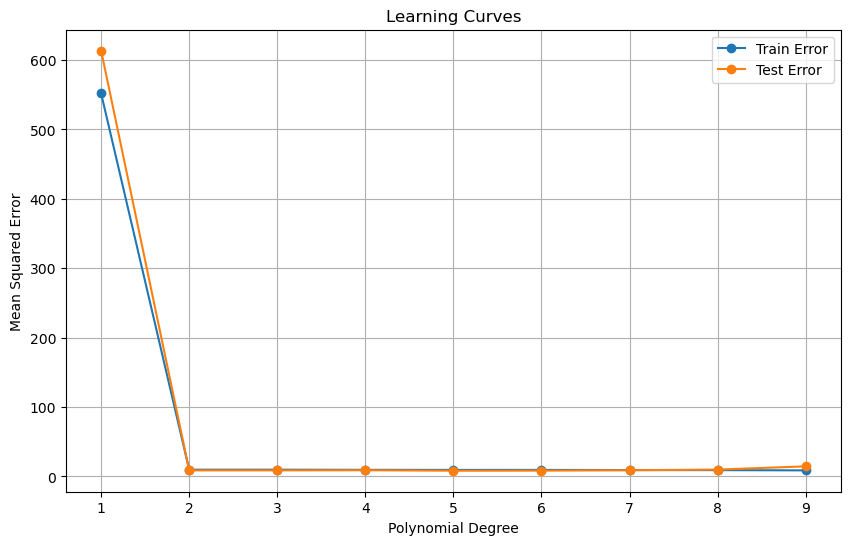

In [51]:
plt.figure(figsize=(10, 6))
plt.plot(degrees, train_errors, label='Train Error', marker='o')
plt.plot(degrees, test_errors, label='Test Error', marker='o')
plt.title('Learning Curves')
plt.xlabel('Polynomial Degree')
plt.ylabel('Mean Squared Error')
plt.xticks(degrees)
plt.legend()
plt.grid(True)
plt.show()

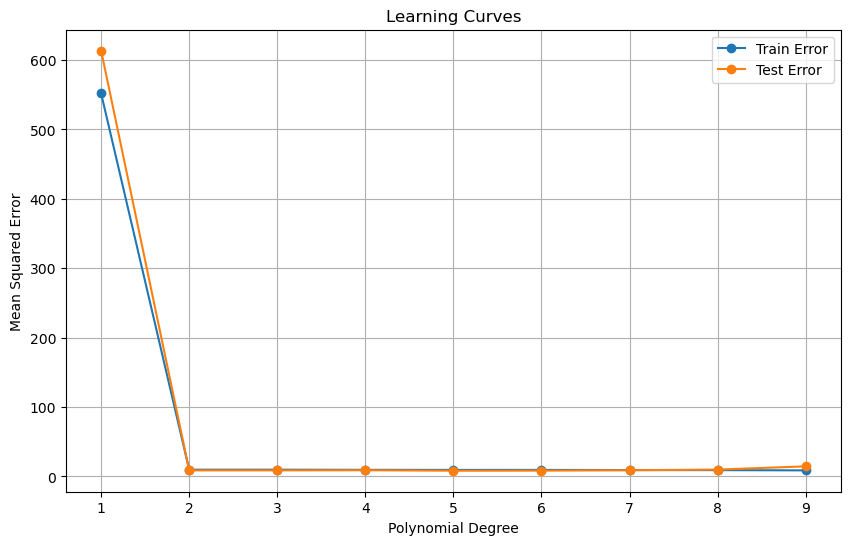

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Generate synthetic data
np.random.seed(0)
X = 2 - 3 * np.random.normal(0, 1, 100)
y = X - 2 * (X ** 2) + np.random.normal(-3, 3, 100)

X = X[:, np.newaxis]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Lists to store errors
train_errors = []
test_errors = []

# Degrees of polynomials to test
degrees = range(1, 10)

for degree in degrees:
    # Create polynomial features
    poly = PolynomialFeatures(degree)
    X_poly_train = poly.fit_transform(X_train)
    X_poly_test = poly.transform(X_test)
    
    # Fit the model
    model = LinearRegression()
    model.fit(X_poly_train, y_train)
    
    # Predict
    y_train_pred = model.predict(X_poly_train)
    y_test_pred = model.predict(X_poly_test)
    
    # Calculate errors
    train_errors.append(mean_squared_error(y_train, y_train_pred))
    test_errors.append(mean_squared_error(y_test, y_test_pred))

# Plotting the errors
plt.figure(figsize=(10, 6))
plt.plot(degrees, train_errors, label='Train Error', marker='o')
plt.plot(degrees, test_errors, label='Test Error', marker='o')
plt.title('Learning Curves')
plt.xlabel('Polynomial Degree')
plt.ylabel('Mean Squared Error')
plt.xticks(degrees)
plt.legend()
plt.grid(True)
plt.show()
